**Sentiment Analysis on Ukrainne Russia War**

IMPORTNG LIBRARIES & WEB SCRAPING

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving scraped_tweets.csv to scraped_tweets (2).csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['scraped_tweets.csv']))

In [ ]:
df.head(10)

,Sr.No.,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,CassVinograd,Journalist | Recently: @nytopinion | Previousl...,"London, England",9620,14331,43532,11,Today @ikhurshudyan and I went to a hospital t...,[]
1,1,SzeDieGapMean,NaN,United Kingdom,1367,435,30072,4,【Protest erupted in #London city center demand...,['London']
2,2,t_vartiainen,The purpose of this twitter account is NOT to ...,NaN,488,68,4810,4,"We have the names, the phone number and the it...",[]
3,3,sakura36017987,freedom for everyone,NaN,171,13,2267,4,【Protest erupted in #London city center demand...,['London']
4,4,Brave_spirit81,News. Incidents. Weather. Cataclysms. Climat. ...,Ukraine 🇺🇦,202,5700,6376,0,Irpin. Genocide of the Ukrainian people.#Ukrai...,"['UkraineWar', 'UkraineRussiaWar', 'Ukraine️']"
5,5,RoseKihumba,An ardent supporter of inclusive sustainable d...,"Nairobi, Kenya",1354,774,3239,1,We can only imagine how hard it must be to liv...,[]
6,6,DetailsYemen,A Yemeni news outlet\nhttps://t.co/F2Poe72GSS,NaN,33,337,10987,0,French President Emmanuel Macron says he is in...,"['Bucha', 'Kyiv', 'UkraineRussiaWar']"
7,7,MrFrostyCool,Trolling trolls from China,NaN,454,70,7731,4,【Protest erupted in #London city center demand...,['London']
8,8,AlexKorenkov87,Director. International research center\nof se...,Украина,237,112,109,0,Today Russian fascists twice shelled Nikolaev ...,"['UkraineRussiaWar', 'WarCrimes']"
9,9,MVichikov,З нами Бог і ЗСУ,NaN,293,195,11470,375,"#UkraineRussiaWar \nMeanwhile, there are some ...",['UkraineRussiaWar']


In [ ]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
nltk.download('vader_lexicon')
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


DATA PREPROCESSING

In [ ]:
from bs4 import BeautifulSoup
from html import unescape

def remove_urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

In [ ]:
def unescape_stuff(x):
    soup = BeautifulSoup(unescape(x), 'lxml')
    return soup.text

In [ ]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [ ]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9]+", ' ', x)
    return cleaned_string 

In [ ]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(unescape_stuff)
df['text'] = df['text'].apply(deEmojify)
df['text'] = df['text'].apply(remove_symbols)
df['text'] = df['text'].apply(unify_whitespaces)

In [ ]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
sp = spacy.load('en_core_web_sm')

cachedStopWords = sp.Defaults.stop_words
cachedStopWords = [x.lower() for x in cachedStopWords]
cachedStopWords.extend(list(stopwords.words('english')))
cachedStopWords = list(set(cachedStopWords))

def remove_stopwords(x):
    
    meaningful_words = []
    my_list = x
    
    tokenized_my_list = word_tokenize(my_list) 
    meaningful_words = [w for w in tokenized_my_list if not w in cachedStopWords]
        
    return " ".join(meaningful_words)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
tweets_sents=df.text.values
tweets_words=[]
for x in tweets_sents:
    tweets_words.append(re.split(r'\s+',x))

In [ ]:
#Lower Case
b=[]
c=[]
for x in tweets_words:
    for y in x:
        c.append(y.lower())
    b.append(c); c=[]
tweets_words=b
tweets_words[:3]

[['today',
  'ikhurshudyan',
  'went',
  'hospital',
  'shelled',
  'russian',
  'military',
  'newborns',
  'patients',
  'tended',
  'bomb',
  'shelter',
  'hospital',
  'sustained',
  'heavy',
  'damage',
  'ukrainerussiawar',
  'washingtonpost'],
 ['protest',
  'erupted',
  'london',
  'city',
  'center',
  'demanding',
  'johnson',
  'step',
  'chinese',
  'netizens',
  'took',
  'chance',
  'contempt',
  'uk',
  'sanctions',
  'russia',
  'disgusting',
  'schadenfreude',
  'alert',
  'thegreattranslationmovement',
  'ukrainerussiawar'],
 ['names',
  'phone',
  'number',
  'items',
  'wanted',
  'send',
  'mother',
  'russia',
  'info',
  'shared',
  'local',
  'authorities',
  'belarus',
  'ukraine',
  'russianwarcrimes',
  'ukrainerussiawar']]

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
tweets_sents=[]
#Lemmatize using WordNetLemmatizer
for x in tweets_words:
    for y in x:
        lemma= nltk.WordNetLemmatizer()
        c.append(lemma.lemmatize(y))
    tweets_sents.append(c);
tweet_words=tweets_sents;c=[];tweets_sents=[]

In [ ]:
#Remove Stopwords From The Tweets
stopwords=nltk.corpus.stopwords.words('english')
b=[]
c=[]
for x in tweets_words:
    for y in x:
        if y not in stopwords:
            c.append(y)
    b.append(c);c=[]
for x in b:
    tweets_sents.append(' '.join(x))

In [ ]:
#Extract Words And Tweets Only From the Data
b=[]
c=[]
for x in tweets_sents:
    b.append(re.findall(r'#?[a-zA-Z]+',x))
tweets_words=b; tweets_sents=[]
for x in b:
    tweets_sents.append(' '.join(x))
tweets_sents[:5]

['today ikhurshudyan went hospital shelled russian military newborns patients tended bomb shelter hospital sustained heavy damage ukrainerussiawar washingtonpost',
 'protest erupted london city center demanding johnson step chinese netizens took chance contempt uk sanctions russia disgusting schadenfreude alert thegreattranslationmovement ukrainerussiawar',
 'names phone number items wanted send mother russia info shared local authorities belarus ukraine russianwarcrimes ukrainerussiawar',
 'protest erupted london city center demanding johnson step chinese netizens took chance contempt uk sanctions russia disgusting schadenfreude alert thegreattranslationmovement ukrainerussiawar',
 'irpin genocide ukrainian people ukrainewar ukrainerussiawar ukraine']

VALDER LEXICON MODEL

In [ ]:
vadler_scores=[]
for x in tweets_sents:
    analyzer=SentimentIntensityAnalyzer()
    vadler_scores.append(analyzer.polarity_scores(x))
vadler_scores[:5]

[{'compound': -0.7506, 'neg': 0.286, 'neu': 0.714, 'pos': 0.0},
 {'compound': -0.7845, 'neg': 0.366, 'neu': 0.495, 'pos': 0.139},
 {'compound': 0.4019, 'neg': 0.0, 'neu': 0.791, 'pos': 0.209},
 {'compound': -0.7845, 'neg': 0.366, 'neu': 0.495, 'pos': 0.139},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]

In [ ]:
vadler_df=pd.DataFrame(vadler_scores)
sentiments=[]
for x in vadler_df['compound']:
    if x<0:
        sentiments.append('Negative');
    elif x==0:
        sentiments.append('Neutral');
    elif x>0:
        sentiments.append('Positive');
vadler_df['Sentiments']=sentiments
vadler_df['Tweets']=tweets_words
vadler_df.head()

,neg,neu,pos,compound,Sentiments,Tweets
0,0.286,0.714,0.000,-0.7506,Negative,"[today, ikhurshudyan, went, hospital, shelled,..."
1,0.366,0.495,0.139,-0.7845,Negative,"[protest, erupted, london, city, center, deman..."
2,0.000,0.791,0.209,0.4019,Positive,"[names, phone, number, items, wanted, send, mo..."
3,0.366,0.495,0.139,-0.7845,Negative,"[protest, erupted, london, city, center, deman..."
4,0.000,1.000,0.000,0.0000,Neutral,"[irpin, genocide, ukrainian, people, ukrainewa..."


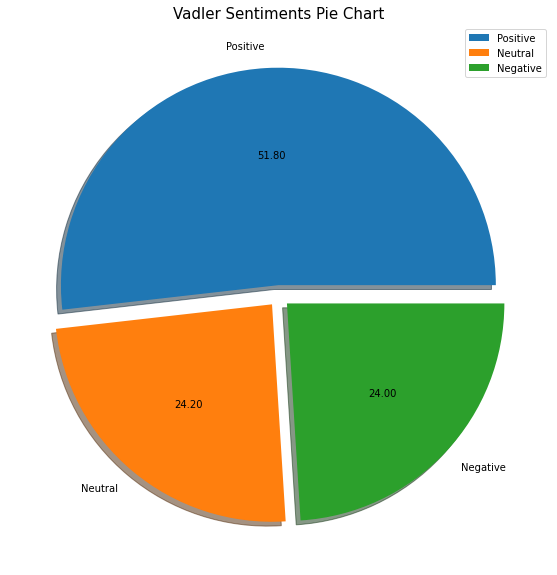

Fig 1.2


In [ ]:
#Pie Chart of sentiments
plt.figure(figsize=(10,10))
plt.title('Vadler Sentiments Pie Chart',size=15)
plt.pie(vadler_df.Sentiments.value_counts().values,labels=['Positive','Neutral','Negative'],explode=[0.05,0.05,0.05],autopct='%.2f', shadow=True)
plt.legend(loc='upper right')
plt.show()
print('Fig 1.2')

In [ ]:
#Adding Sr.No. column to valder_df
vadler_df = vadler_df.reset_index()
vadler_df = vadler_df.rename(columns={"index":"Sr.No."})
vadler_df['Sr.No.'] = vadler_df.index + 0

In [ ]:
#del vadler_df['Sr.No.']
#del vadler_df['New_ID']

In [ ]:
vadler_df.head()

,Sr.No.,neg,neu,pos,compound,Sentiments,Tweets
0,0,0.286,0.714,0.000,-0.7506,Negative,"[today, ikhurshudyan, went, hospital, shelled,..."
1,1,0.366,0.495,0.139,-0.7845,Negative,"[protest, erupted, london, city, center, deman..."
2,2,0.000,0.791,0.209,0.4019,Positive,"[names, phone, number, items, wanted, send, mo..."
3,3,0.366,0.495,0.139,-0.7845,Negative,"[protest, erupted, london, city, center, deman..."
4,4,0.000,1.000,0.000,0.0000,Neutral,"[irpin, genocide, ukrainian, people, ukrainewa..."


In [ ]:

merged_df = pd.merge(df, vadler_df, how='inner',on=['Sr.No.','Sr.No.']) 
merged_df.head()

,Sr.No.,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,neg,neu,pos,compound,Sentiments,Tweets
0,0,CassVinograd,Journalist | Recently: @nytopinion | Previousl...,"London, England",9620,14331,43532,11,today ikhurshudyan went hospital shelled russi...,[],0.286,0.714,0.000,-0.7506,Negative,"[today, ikhurshudyan, went, hospital, shelled,..."
1,1,SzeDieGapMean,NaN,United Kingdom,1367,435,30072,4,protest erupted london city center demanding j...,['London'],0.366,0.495,0.139,-0.7845,Negative,"[protest, erupted, london, city, center, deman..."
2,2,t_vartiainen,The purpose of this twitter account is NOT to ...,NaN,488,68,4810,4,names phone number items wanted send mother ru...,[],0.000,0.791,0.209,0.4019,Positive,"[names, phone, number, items, wanted, send, mo..."
3,3,sakura36017987,freedom for everyone,NaN,171,13,2267,4,protest erupted london city center demanding j...,['London'],0.366,0.495,0.139,-0.7845,Negative,"[protest, erupted, london, city, center, deman..."
4,4,Brave_spirit81,News. Incidents. Weather. Cataclysms. Climat. ...,Ukraine 🇺🇦,202,5700,6376,0,irpin genocide ukrainian people ukrainewar ukr...,"['UkraineWar', 'UkraineRussiaWar', 'Ukraine️']",0.000,1.000,0.000,0.0000,Neutral,"[irpin, genocide, ukrainian, people, ukrainewa..."


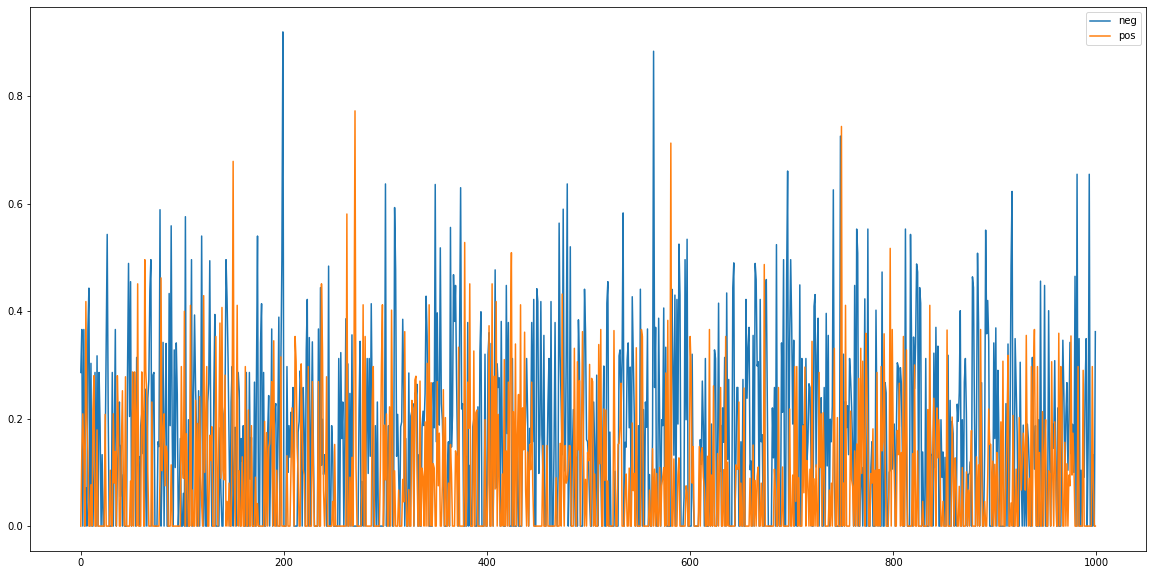

In [ ]:
merged_df[['neg', 'pos']].plot(figsize=(20, 10))

In [ ]:
#Let's take A peek At our Tweets with Negative Sentiments
vadler_neg_tweets=merged_df[merged_df.Sentiments=='Negative']
#Sort Them by negativities in decreasing Order.
vadler_neg_tweets=vadler_neg_tweets.sort_values(by='neg',ascending=False)
vadler_neg_tweets.head(10)

,Sr.No.,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,neg,neu,pos,compound,Sentiments,Tweets
199,199,pavla_journo,I Journalist- Fluent French & German I #substa...,🇪🇺🇬🇧,428,438,5767,0,shocking brutal murder ukrainerussiawar,['UkraineRussiaWar'],0.920,0.080,0.000,-0.9100,Negative,"[shocking, brutal, murder, ukrainerussiawar]"
564,564,Santosh50542100,"सबके लिए न्याय, सस्ता न्याय, सुगम न्याय, किसान...","Etawah, India",460,123,6730,4,misery war ukrainerussiawar,"['war', 'UkraineRussiaWar']",0.884,0.116,0.000,-0.8225,Negative,"[misery, war, ukrainerussiawar]"
748,748,tropes_official,NFT 🔰 /// 🕷🕷 $Ape ☕ ⚡⚡#16004,0x⚡0g,730,731,4166,0,anti hate anti sexism anti virus anti homophob...,"['NFTProject', 'UkraineRussiaWar', 'NFTCollect...",0.726,0.274,0.000,-0.9678,Negative,"[anti, hate, anti, sexism, anti, virus, anti, ..."
696,696,adventuresam_,"writer, climber, software engineer | she/her |...","New York, NY",694,66,134,0,war crimes ukrainerussiawar,['UkraineRussiaWar'],0.661,0.339,0.000,-0.5994,Negative,"[war, crimes, ukrainerussiawar]"
981,981,ItsRobHayes,CEO of Thirty Dark Zero Records #ItsRob | book...,"Los Angeles, CA",76,17,175,0,saddened happening ukrainerussiawar misinforma...,['UkraineRussiaWar'],0.655,0.345,0.000,-0.7650,Negative,"[saddened, happening, ukrainerussiawar, misinf..."
993,993,TB_JD92,slava ukraini,Tampa Bay Florida,746,690,1538,0,read threat nuts ukraine ukrainerussiawar,"['ukraine', 'UkraineRussiaWar']",0.655,0.345,0.000,-0.6908,Negative,"[read, threat, nuts, ukraine, ukrainerussiawar]"
479,479,kk131066,SAY WHAT YOU MEAN & MEAN WHAT YOU SAY\n\nWARNI...,"Kuala Lumpur, Malaysia",28728,32744,125914,3,fact black americans denied justice dead sick ...,['fact'],0.637,0.277,0.086,-0.9716,Negative,"[fact, black, americans, denied, justice, dead..."
300,300,porangi69,"𝔣𝔬𝔲𝔯 𝔠𝔬𝔩𝔬𝔲𝔯 𝔡𝔢𝔪𝔬𝔫𝔰 𝔣𝔬𝔯 𝔩𝔦𝔣𝔢 Poppa,Socialist","Aotearoa, Earth",1861,1124,8722,3,fact black americans denied justice dead sick ...,['fact'],0.637,0.277,0.086,-0.9716,Negative,"[fact, black, americans, denied, justice, dead..."
349,349,anionscop,Peace activist. “Fear is the path to the dark ...,EARTH,65,19,230,1,high levels stress negative feelings mistreat ...,"['UkraineRussiaWar', 'Ukraine️', 'Ukraina', 'U...",0.636,0.364,0.000,-0.9709,Negative,"[high, levels, stress, negative, feelings, mis..."
374,374,ShadowofFnoot,"Back once again like the renegade master, alth...",United Kingdom,487,291,2452,0,ukrainerussiawar ukraine lying,['UkraineRussiaWar'],0.630,0.370,0.000,-0.5267,Negative,"[ukrainerussiawar, ukraine, lying]"


In [ ]:
#Let's take A peek At our Tweets with Positive Sentiments
vadler_pos_tweets=merged_df[merged_df.Sentiments=='Positive']
#Sort Them by positivities in decreasing Order.
vadler_pos_tweets=vadler_pos_tweets.sort_values(by='pos',ascending=False)
vadler_pos_tweets.head(10)

,Sr.No.,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,neg,neu,pos,compound,Sentiments,Tweets
270,270,brounental,Паровозопузо,NaN,75,13,14335,0,borisjohnson wow powerful message mr borisjohn...,"['Ukraine', 'UkraineRussiaWar']",0.000,0.227,0.773,0.9712,Positive,"[borisjohnson, wow, powerful, message, mr, bor..."
749,749,TomOLeary4,"Reader, writer, 'retha lover",Los Angeles,891,577,21866,7,wow powerful point surprise ukrainerussiawar g...,"['UkraineRussiaWar', 'GRAMMYs']",0.000,0.256,0.744,0.8271,Positive,"[wow, powerful, point, surprise, ukrainerussia..."
581,581,hendricxsantos,#BLM #SalvaUkraini #HeroyamSlava #BidenLeaderO...,NaN,34,73,26722,1,alixmortimer thanks encouraging write hope int...,"['RussianWarCrimes', 'UkraineRussiaWar']",0.000,0.287,0.713,0.9313,Positive,"[alixmortimer, thanks, encouraging, write, hop..."
150,150,Nikoloz_Kh,NaN,NaN,50,10,4,0,glory ukraine glory hero buchagenocide ukraine...,"['BuchaGenocide', 'UkraineRussiaWar', 'Ukraine...",0.000,0.321,0.679,0.8910,Positive,"[glory, ukraine, glory, hero, buchagenocide, u..."
262,262,kemstar11,"Observant, Christian, ain’t no punk. I’m sweet...",My clothes,365,86,4874,0,clears throat hello united states america pres...,['UkraineRussiaWar'],0.000,0.419,0.581,0.8591,Positive,"[clears, throat, hello, united, states, americ..."
378,378,The_______Don,🇪🇺 🇺🇦 Slava Ukraini 🇺🇦 🇪🇺\n🇺🇸 🇹🇼 FreeTaiwan 🇹🇼 🇺🇸,EU,111,123,1680,0,diversity armor improvements impressive ukrain...,"['UkraineRussiaWar', 'RussianArmy', 'StopRussia']",0.000,0.472,0.528,0.6808,Positive,"[diversity, armor, improvements, impressive, u..."
797,797,kojodoug,"I drive fast cars, and I eat fast foods - I co...","Accra, Ghana",990,378,12837,0,support party seek help nice things mass grave...,"['massgraves', 'UkraineRussiaWar', 'Ukraine', ...",0.104,0.379,0.517,0.8271,Positive,"[support, party, seek, help, nice, things, mas..."
424,424,daclayfish,"Been a curmudgeon of sorts most of my life, an...",SoCal (for now),80,31,4976,0,thank bill watterson funny funny right vladimi...,"['VladimirPutin', 'Ukraine', 'UkraineRussiaWar...",0.000,0.491,0.509,0.8074,Positive,"[thank, bill, watterson, funny, funny, right, ..."
63,63,samsinger,Sam Singer is president of Singer Associates P...,San Francisco,2577,3830,32298,1,women peace security april 2022 un afghanwomen...,"['UN', 'AfghanWomen', 'UkraineRussiaWar', 'LSE']",0.000,0.504,0.496,0.7096,Positive,"[women, peace, security, april, un, afghanwome..."
673,673,Crystal4Trump,"Entrepreneur, 501c3, Adopt don't Shop! Advoca...","Texas, USA",5334,4842,46905,0,zylenskyy nazi lover protector ukrainerussiawar,"['Zylenskyy', 'UkraineRussiaWar']",0.000,0.513,0.487,0.5859,Positive,"[zylenskyy, nazi, lover, protector, ukrainerus..."


In [ ]:
pos_tweet_max_retweeted=vadler_pos_tweets.sort_values(by='retweetcount',ascending=False)
pos_tweet_max_retweeted['text'].head(1)

133    sfu token continued impressive performance hel...
Name: text, dtype: object

In [ ]:
neg_tweet_max_retweeted=vadler_neg_tweets.sort_values(by='retweetcount',ascending=False)
neg_tweet_max_retweeted['text'].head(1)

718    found 18 bodies torturing people ears cut teet...
Name: text, dtype: object

In [ ]:
foll_sum=merged_df.groupby('Sentiments').sum()
#foll_sum.drop(foll_sum.columns[[1,]], axis = 1, inplace = True)
foll_sum.drop(['Sr.No.','following', 'totaltweets', 'retweetcount'], axis=1, inplace=True)
foll_sum

,followers,neg,neu,pos,compound
Sentiments,,,,,
Negative,4196176,148.481,342.526,26.974,-300.5038
Neutral,516892,0.461,241.077,0.461,0.0000
Positive,1424926,12.787,165.367,61.840,116.4582


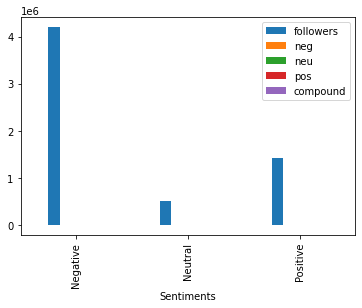

In [ ]:
foll_sum.plot.bar()
plt.show()

In [ ]:
from wordcloud import WordCloud

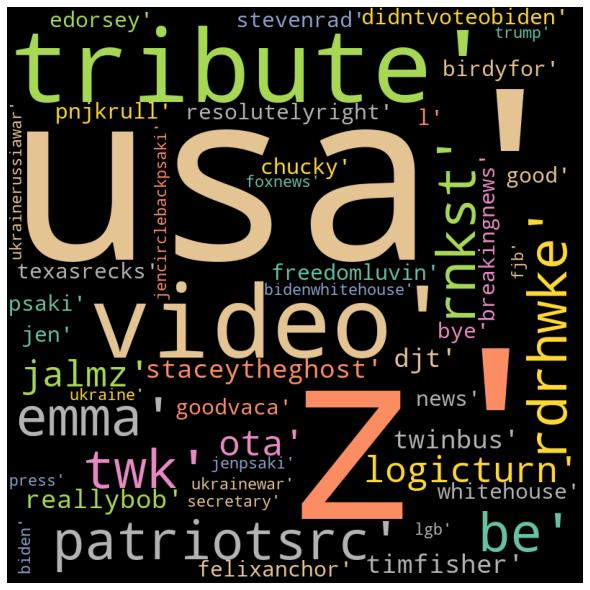

In [ ]:
# iterate through the csv file
for val in vadler_pos_tweets.Tweets:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words = ''
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 6, max_words=2000,
                colormap = 'Set2').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

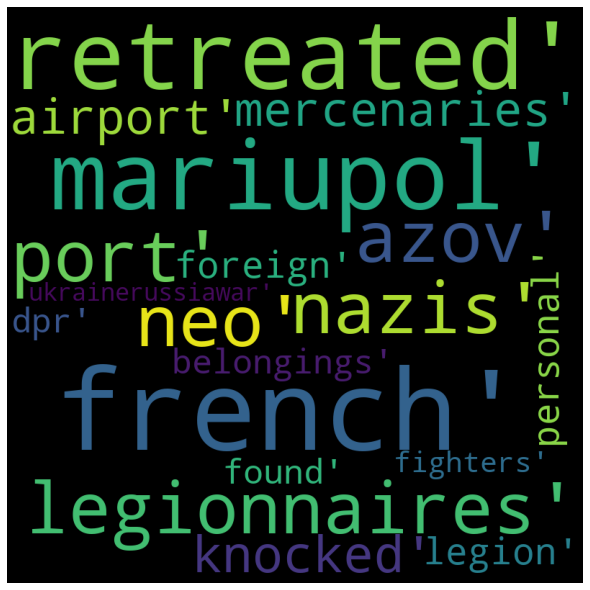

In [ ]:
# iterate through the csv file
for val in vadler_neg_tweets.Tweets:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words = ''
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 6, max_words=2000).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

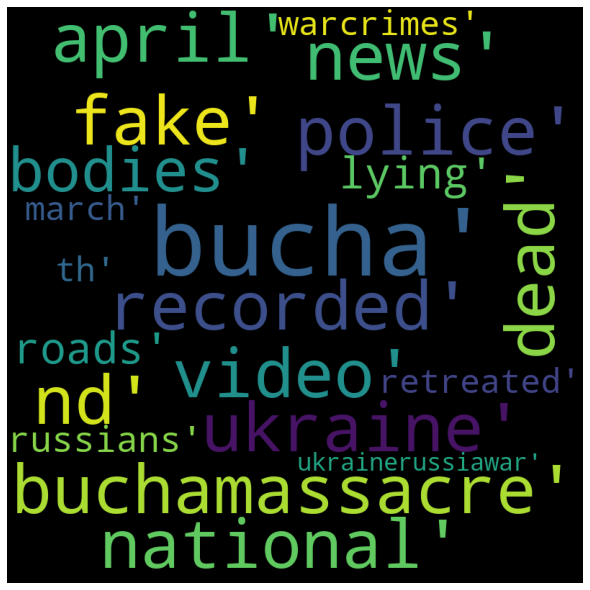

In [ ]:
#Full df
# iterate through the csv file
for val in vadler_df.Tweets:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words = ''
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 6, max_words=2000).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()